<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Clase 2</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Representación de números en el computador
    </p>
</div>

¿Cómo obtener la representación binaria de un número entero en Python?

In [2]:
# utilizamos el comando bin
numero = 5342

print(bin(numero))

print(bin(numero)[2:])

0b1010011011110
1010011011110


¿Qué tipo de dato devuelve la función `bin()`? *Pista: Utilice la función* `type()`

In [3]:
type(bin(numero))

str

¿Y si aplicamos la función `bin()` al número decimal $13.2$?

In [4]:
bin(13.2)

TypeError: 'float' object cannot be interpreted as an integer

¿Cómo obtenemos la representación de punto flotante de un número no entero en Python?

In [8]:
import struct
def binary_32(num):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))

def binary_64(num):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!d', num))

num = 0.1

representacion_32bits = binary_32(num)
representacion_64bits = binary_64(num)

# Imprima el número 0.1 en 32 y 64 bits usando f-strings
#...

print(f" El número {num} tiene la siguiente representación de 32 bits: {representacion_32bits}")
print(f" El número {num} tiene la siguiente representación de 64 bits: {representacion_64bits}")


 El número 0.1 tiene la siguiente representación de 32 bits: 00111101110011001100110011001101
 El número 0.1 tiene la siguiente representación de 64 bits: 0011111110111001100110011001100110011001100110011001100110011010


¿Qué ocurre con el 0.1?

In [12]:
import numpy as np

a_32 = np.float32(0.1)
a_64 = np.float64(0.1)

#Imprima ambos números usando f-string y formatee la salida para mostrar al menos 20 decimales
#...

print(f"{a_32:.20f}")
print(f"{a_64:.20f}")

0.10000000149011611938
0.10000000000000000555


¿$0.1 + 0.2 + 0.3 = 0.6$? Matemáticamente esto es verdadero, pero... ¿computacionalmente lo será?

In [17]:
# compruebe

print(f"{0.1 + 0.2 + 0.3:.20f}")

print(f"{0.6:.20f}")

0.60000000000000008882
0.59999999999999997780


Imprima 0.6 con 20 decimales y haga lo mismo para la suma 0.1 + 0.2 + 0.3:

La suma en un sistema informático no cumple la propiedad asociativa:

In [18]:
print(f"suma: 0.1 + (0.2 + 0.3) = {0.1 + (0.2 + 0.3):.20}")
print(f"suma: (0.1 + 0.2) + 0.3 = {(0.1 + 0.2) + 0.3:.20}")

suma: 0.1 + (0.2 + 0.3) = 0.5999999999999999778
suma: (0.1 + 0.2) + 0.3 = 0.60000000000000008882


0.1 + 0.1 + ... 0.1 (sumado 100 veces) = 10... o no?

In [21]:
# utilice un ciclo para sumar iterativamente 100 veces el número 0.1
# guarde este resultado en una variable llamada "a"

a = 0.1
for _ in range(100):
    #a = a + 0.1
    a += 0.1

a


10.09999999999998

In [23]:
b = 0.1*100

print(f"{b:.20f}")

10.00000000000000000000


Determine el error relativo porcentual entre $a$ y $b$, definido como:

$$ \varepsilon_\% = 100 \cdot \left| \frac{a - b}{b} \right| $$

In [26]:
# imprima el resultado

print(f"el error relativo porcentual entre a y b es: {100*abs((a-b)/b):.2f}")

el error relativo porcentual entre a y b es: 1.00


#### **Expansión en serie de Taylor**

Una expansión en serie de Taylor es una forma de aproximar una función matemática complicada utilizando una serie de términos más simples. Básicamente, descompone la función en una suma infinita de términos polinómicos, donde cada término se calcula a partir de las derivadas de la función evaluadas en un punto específico $x_0$:

$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n = a_0 + a_1 (x-x_0) + a_2 (x-x_0)^2 + a_3 (x-x_0)^3 + ... $$

Esta aproximación es útil para hacer cálculos aproximados de funciones complejas alrededor de un punto conocido $x_0$ (generalmente se utiliza $x_0=0$).







<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio**: Implemente la suma de la serie de Taylor, para aproximar la función $\sin(x)$:

$$ \sin(x) \approx \sum_{n=0}^{N} \frac{(-1)^n}{(2n+1)!} x^{2n+1} $$

utilice para ello $N=1,2,3,4,5,6,7,8,9,10$ y evalúe la función en $x=\pi/2$.

Compare con el resultado exacto $\sin(\pi/2) = 1$ y determine el error relativo porcentual $\varepsilon_\%$ para cada $N$.

</div>

In [31]:
# Su código acá. Definan una función.
import math
import numpy as np

def sin_taylor(N, x):

    suma = 0
    for n in range(N):
        suma += (-1)**n * x **(2*n+1) / math.factorial(2*n + 1)

    return suma

Sin_x = []
for n in range(1, 25):
    sin_x = sin_taylor(N=n, x=np.pi/2)
    Sin_x.append(sin_x)

Sin_x

[1.5707963267948966,
 0.9248322292886504,
 1.0045248555348174,
 0.9998431013994987,
 1.0000035425842861,
 0.999999943741051,
 1.0000000006627803,
 0.9999999999939768,
 1.0000000000000437,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002]

Use `matplotlib.pyplot` para graficar $\varepsilon_\%$ vs $N$:

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Para finalizar:** grafique la aproximación de la función $\sin(x)$ mediante su expansión en serie de Taylor para $N=1,2,3,4,5$ en el dominio $x \in [0, \pi]$.

Compare estas aproximaciones con los valores obtenidos mediante la función `numpy.sin()`.

</div>

<b><font size='4'>Gráfico Esperado:</font></b>

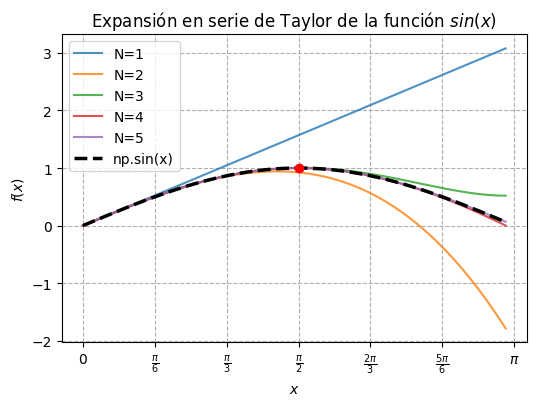

In [ ]:
# código acá

<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:** ¿Qué aprendimos?

- En esta clase exploramos las distintas formas en que los números se representan en un sistema computacional.

- Aprendimos que, debido a la cantidad limitada de bits disponibles para almacenar información, los números con muchos decimales deben truncarse, lo que da lugar a errores numéricos.

- También estudiamos la serie de Taylor como herramienta matemática, y observamos que, dado que no es posible sumar una cantidad infinita de términos en un computador, la serie debe truncarse, lo que también introduce un error numérico.

**Próxima clase:** Errores de redondeo y errores de aproximación
</div>

<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional III para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>